In [3]:
%run twisted_graphene.py

In [4]:
g=TwistedBilayerGraphene(0,1)

In [5]:
G,K,M=g.Gamma,g.K[0],g.M[0]
versor=lambda p1,p2: (p2-p1)/np.linalg.norm(p2-p1)
radius=0.2
g.set_kpath([K+radius*versor(K,M),K,K+radius*versor(K,G)],[150,150])
Ktick=g.kticks[1]
g.ell=g.ell-g.ell[Ktick]

In [6]:
VV2=np.linspace(0,1,100)
tp=t_inter(0,0,0,0,1,1,0.0) #máximo valor do hopping interlayer, análogo do t_\perp no artigo
delta_g=tp*VV2/np.sqrt(tp**2+VV2**2)

/home/vgmdu/MEGA/Física/Twistrônica/code/twisted_graphene.py:208: RuntimeWarning: invalid value encountered in double_scalars
  xx=np.nan_to_num(x/r) #cosseno direcional na direção x
/home/vgmdu/MEGA/Física/Twistrônica/code/twisted_graphene.py:209: RuntimeWarning: invalid value encountered in double_scalars
  yy=np.nan_to_num(y/r) #cosseno direcional na direção y


/home/vgmdu/MEGA/Física/Twistrônica/code/twisted_graphene.py:208: RuntimeWarning: invalid value encountered in true_divide
  xx=np.nan_to_num(x/r) #cosseno direcional na direção x
/home/vgmdu/MEGA/Física/Twistrônica/code/twisted_graphene.py:209: RuntimeWarning: invalid value encountered in true_divide
  yy=np.nan_to_num(y/r) #cosseno direcional na direção y


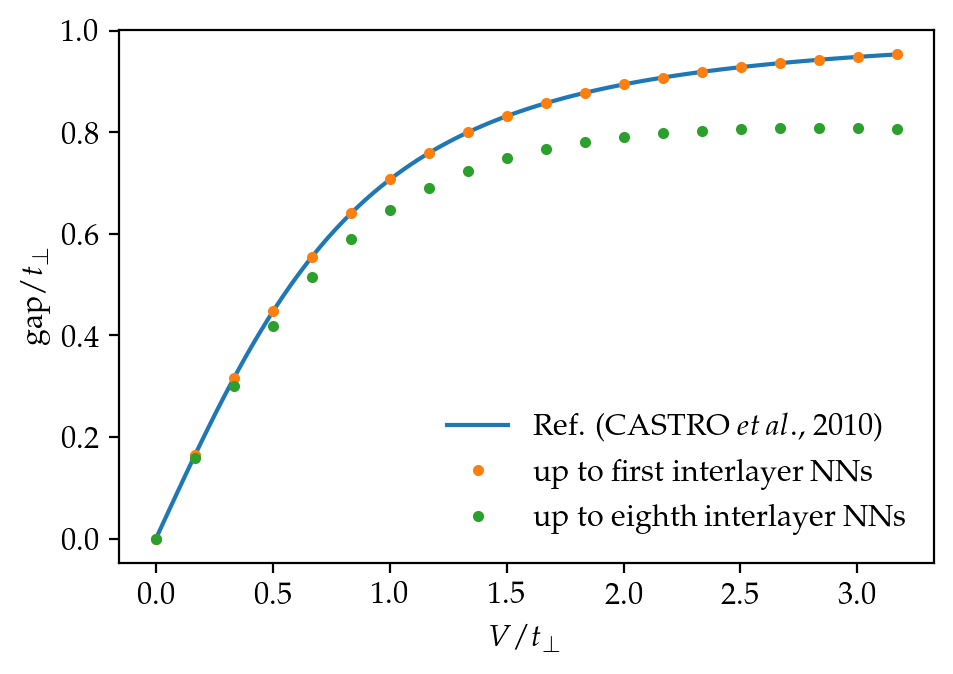

In [7]:
plt.plot(VV2/tp,delta_g/tp,label='Ref. (CASTRO $et\, al$., 2010)')

for d,label in zip([3.36,6.6],['first','eighth']):
    g.calc_hops(d)

    g.set_hamiltonian(1.0,0.0)

    g.calc_bands(4,0.0)

    g.bands0=g.bands

    VV=np.linspace(0,1,20)
    bands={}
    for V in VV:
        g.set_hamiltonian(1.0,V)
        g.calc_bands(4,0.0)
        bands[V]=g.bands

    VBmaxs=[]
    CBmins=[]
    Ktick=g.kticks[2]
    for V in VV:
        _bands=bands[V]
        VBmax_MK=np.argmax(_bands[0:Ktick,1])
        CBmin_left=np.argmin(_bands[0:Ktick,2])
        VBmax_KG=np.argmax(_bands[Ktick::,1])+Ktick
        CBmin_KG=np.argmin(_bands[Ktick::,2])+Ktick
        iiV=[VBmax_MK,VBmax_KG]
        iiC=[CBmin_left,CBmin_KG]
        VBmaxs.append(_bands[iiV,1])
        CBmins.append(_bands[iiC,2])
    VBmaxs=np.array(VBmaxs)
    CBmins=np.array(CBmins)

    gaps=CBmins-VBmaxs
    true_gaps=np.min(gaps,axis=1)

    plt.plot(VV/tp,true_gaps/tp,'.',label=f'up to {label} interlayer NNs')
    

plt.legend(frameon=False)
plt.xlabel('$V/t_{\perp}$')
plt.ylabel('gap$/t_{\perp}$')

plt.savefig('Fig21_gAB_electric_field_gap.svg')

plt.show()

In [1]:
6*2.8922e10/3.35

51800597014.92537